# GridSearchCV for the Classifier

In this notebook, we perform a grid search on two types of classifiers: (a) logistic regression and (b) SVM.

The features are extracted using a vectorizer with the following params:

```python
dict(
    analyzer='char', 
    sg_only=False, 
    sanitizer=None, 
    max_features=10000, 
    ngram_range=(3, 3),
    sublinear_tf=True, 
    use_idf=True
)
```

__Note__: here, the data are _not sanitized_.

In [2]:
%run notebook_utils.py
%run gridsearch_utils.py

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
import matplotlib

# set big font in plots
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [5]:
%cd ..
from langid import sanitize, np_sanitize, WrappedVectorizer
%cd -

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


# data loading

In [6]:
X, y = load_data()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# Creating the vectorizer

In [7]:
vect = WrappedVectorizer(
    analyzer='char', sg_only=False, sanitizer=None, max_features=10000, ngram_range=(3, 3),
    sublinear_tf=True, use_idf=True)

Xvec = vect.fit_transform(X, y)

# GridSearch on LogisticRegression

In [10]:
params = dict(C=[1, 10, 20, 100], solver=('newton-cg', 'liblinear'))

clf = LogisticRegression()
gs = GridSearchCV(clf, params, n_jobs=-1, verbose=1)

gs.fit(Xvec, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   31.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 20, 100], 'solver': ('newton-cg', 'liblinear')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
print_best_estimator(gs)
print_scores(gs)


Best score: 0.992
Best parameters set:
	C: 100
	solver: 'newton-cg'
Grid scores on development set:

0.990 (+/-0.005): :1, :newton-cg
0.990 (+/-0.005): :1, :liblinear
0.991 (+/-0.005): :10, :newton-cg
0.991 (+/-0.005): :10, :liblinear
0.991 (+/-0.005): :20, :newton-cg
0.991 (+/-0.005): :20, :liblinear
0.992 (+/-0.005): :100, :newton-cg
0.991 (+/-0.005): :100, :liblinear


## testing multi_class parameter (only for newton-cg)

In [12]:
params2 = dict(C=[1, 10, 20, 100], multi_class=('ovr', 'multinomial'))

clf2 = LogisticRegression(solver='newton-cg')
gs2 = GridSearchCV(clf2, params2, n_jobs=-1, verbose=1)

gs2.fit(Xvec, y)

print_best_estimator(gs2)
print_scores(gs2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.0s finished



Best score: 0.992
Best parameters set:
	C: 100
	multi_class: 'ovr'
Grid scores on development set:

0.990 (+/-0.005): :1, class:ovr
0.991 (+/-0.004): :1, class:multinomia
0.991 (+/-0.005): :10, class:ovr
0.991 (+/-0.005): :10, class:multinomia
0.991 (+/-0.005): :20, class:ovr
0.991 (+/-0.004): :20, class:multinomia
0.992 (+/-0.005): :100, class:ovr
0.991 (+/-0.005): :100, class:multinomia


# tuning C only (liblinear)

In [32]:
%%time

lrcv = LogisticRegressionCV(Cs=50) # If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.   
lrcv.fit(Xvec, y)

for (c, s) in lrcv.scores_.items():
    print(c, s.mean(axis=0).max(), s.mean(axis=0).argmax())

0 0.994342930370883 44
1 0.9981428489049665 44
2 0.9959716732700093 48
3 0.9983143509422878 48
4 0.9839143136251683 36


In [14]:
Cs = [1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]

clf3 = LogisticRegression()
gs3 = GridSearchCV(clf2, dict(C=Cs), n_jobs=-1, verbose=1)

gs3.fit(Xvec, y)

print_best_estimator(gs3)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.0min finished



Best score: 0.992
Best parameters set:
	C: 75.4312006


# Get real results

TEST SET
accuracy: 0.9972

             precision    recall  f1-score   support

         de     0.9979    0.9952    0.9966      1462
         fr     0.9993    0.9980    0.9986      1468
         en     0.9980    0.9967    0.9974      1538
         it     0.9987    0.9993    0.9990      1482
         sg     0.9917    0.9965    0.9941      1438

avg / total     0.9972    0.9972    0.9972      7388



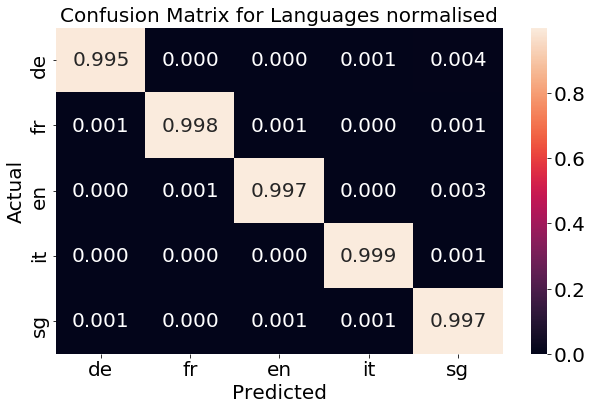

SMS RECALL
total samples    10692
total errors        82 (0.77%)
---------------------------------
languages detected
    de       69
    fr        2
    en        6
    it        5
    sg    10610


VALIDATION SET
accuracy: 0.9859

             precision    recall  f1-score   support

         de     0.9402    0.9981    0.9683      2613
         fr     0.9992    0.9989    0.9990      2613
         en     0.9981    0.9996    0.9989      2613
         it     0.9981    1.0000    0.9990      2613
         sg     0.9975    0.9330    0.9642      2613

avg / total     0.9866    0.9859    0.9859     13065



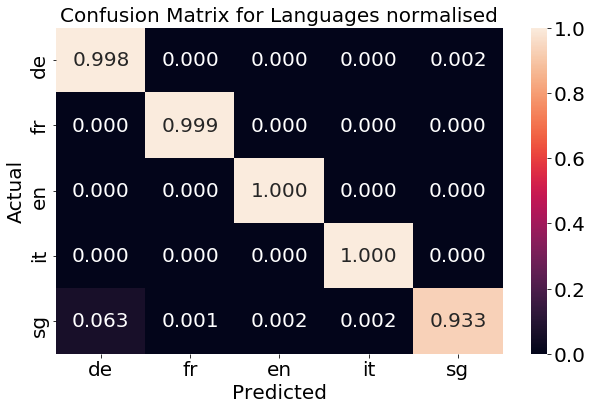

In [8]:
pipe1 = Pipeline([
    ('vect', vect),
    ('clf', LogisticRegression(C=75))
])

pipe1.fit(X_train, y_train)

print("TEST SET")
print("========")
y_pred = pipe1.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(pipe1)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = pipe1.predict(X_valid)
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)

# SVM

In [11]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
from sklearn.svm import SVC

In [17]:
# Set the parameters by cross-validation
svc_params = [
    {'kernel': ['rbf'], 
     'gamma': [1e-3, 1e-4],
     'C': [1, 10, 100, 1000]
    },
    {'kernel': ['linear'], 
     'C': [1, 10, 100, 1000]
    }
]

gsvm = GridSearchCV(SVC(C=1, max_iter=1000), svc_params, n_jobs=-1, verbose=1)

gsvm.fit(Xvec, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 42.0min finished
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [18]:
print_best_estimator(gsvm)


Best score: 0.991
Best parameters set:
	C: 100
	gamma: 0.001
	kernel: 'rbf'


In [19]:
print_scores(gsvm)

Grid scores on development set:

0.948 (+/-0.019): :1, :0.001, :rbf
0.932 (+/-0.027): :1, :0.0001, :rbf
0.986 (+/-0.001): :10, :0.001, :rbf
0.949 (+/-0.027): :10, :0.0001, :rbf
0.991 (+/-0.004): :100, :0.001, :rbf
0.986 (+/-0.002): :100, :0.0001, :rbf
0.991 (+/-0.005): :1000, :0.001, :rbf
0.991 (+/-0.004): :1000, :0.0001, :rbf
0.991 (+/-0.004): :1, :linear
0.990 (+/-0.005): :10, :linear
0.990 (+/-0.005): :100, :linear
0.990 (+/-0.005): :1000, :linear


TEST SET
accuracy: 0.9958

             precision    recall  f1-score   support

         de     0.9979    0.9911    0.9945      1462
         fr     0.9993    0.9993    0.9993      1468
         en     0.9987    0.9954    0.9971      1538
         it     0.9986    0.9960    0.9973      1482
         sg     0.9842    0.9972    0.9907      1438

avg / total     0.9958    0.9958    0.9958      7388



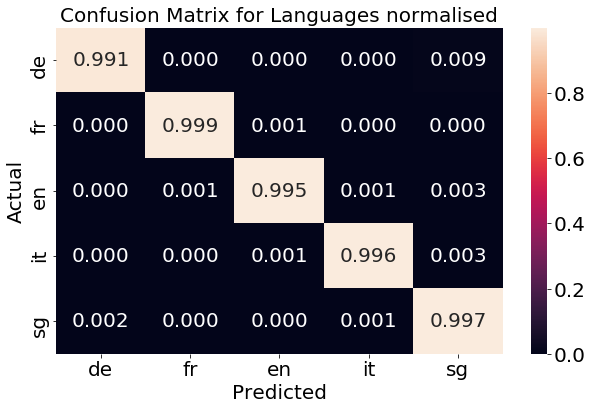

SMS RECALL
total samples    10692
total errors        46 (0.43%)
---------------------------------
languages detected
    de       43
    fr        1
    en        1
    it        1
    sg    10646


VALIDATION SET
accuracy: 0.9865

             precision    recall  f1-score   support

         de     0.9525    0.9908    0.9713      2613
         fr     0.9992    0.9989    0.9990      2613
         en     0.9981    0.9966    0.9973      2613
         it     0.9981    0.9985    0.9983      2613
         sg     0.9861    0.9480    0.9666      2613

avg / total     0.9868    0.9865    0.9865     13065



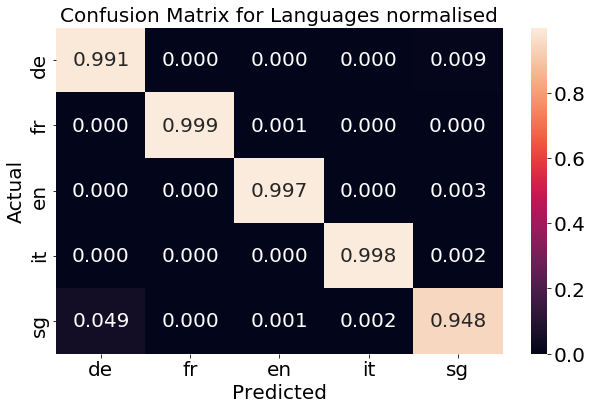

In [12]:
svm_pipe = Pipeline([
    ('vect', TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(3, 3), sublinear_tf=True, use_idf=True)),
    ('clf', SVC(max_iter=1000, probability=True, C=100, gamma=0.001, kernel='rbf'))
])


svm_pipe.fit(X_train, y_train)

print("TEST SET")
print("========")
y_pred = svm_pipe.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(svm_pipe)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = svm_pipe.predict(X_valid)
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)

Testing on SMS any

accuracy: 0.8607

             precision    recall  f1-score   support

         de     1.0000    0.7363    0.8481       201
         fr     1.0000    0.9254    0.9612       201
         en     1.0000    0.6915    0.8176       201
         it     1.0000    0.9502    0.9745       201
         sg     0.5894    1.0000    0.7417       201

avg / total     0.9179    0.8607    0.8686      1005



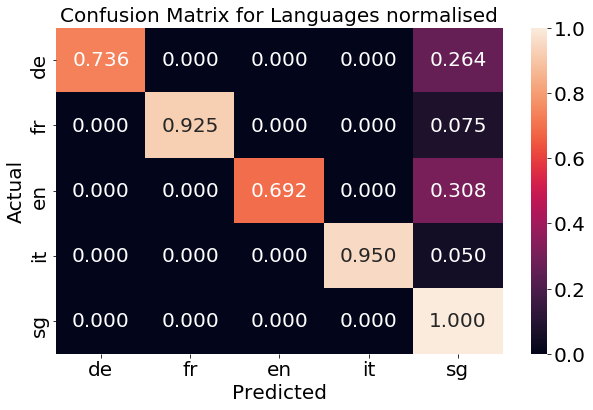

In [13]:
print("Testing on SMS any")
print("==================\n")

sms_any_predicted = svm_pipe.predict(sms_any_X)
print_results(sms_any_y, sms_any_predicted)
plot_confusion_matrix(sms_any_y, sms_any_predicted, normalised=True)